<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

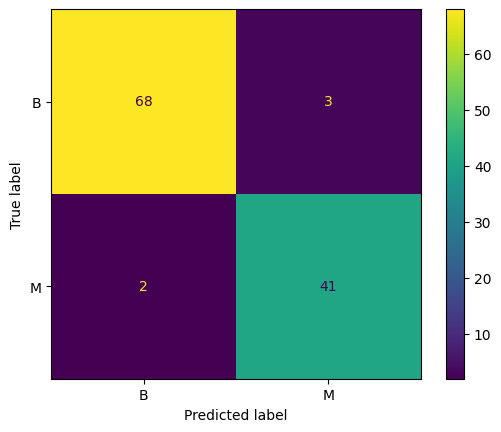

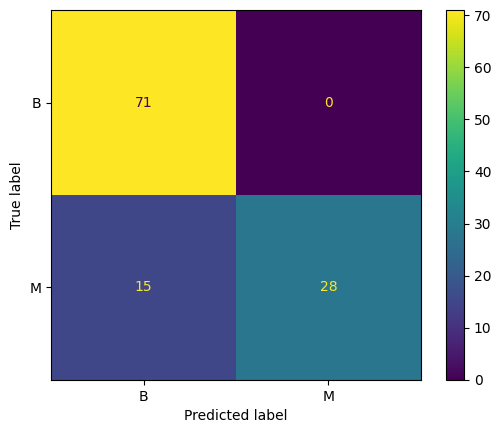

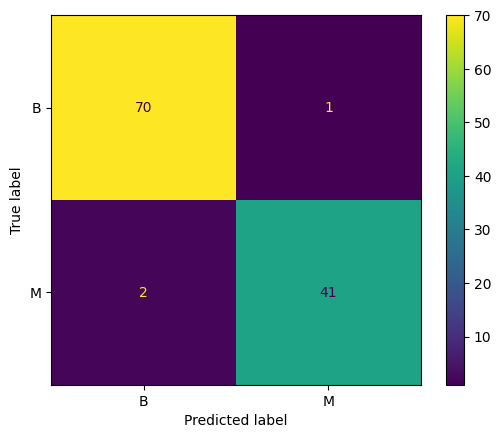

In [ ]:
import pandas as pd  # importing pandas
df=pd.read_csv("/content/Cancer_Data.csv")  # importing the file
df.head()  # to see values inside df
df["diagnosis"].value_counts()  # to know the values inside the column dignosis

df.info()  # to see information about the dataset

#deleting unnecessary columns from data
del df["id"]
del df["Unnamed: 32"]

#splitting the data into features and class-label
X=df.iloc[:,1:]
y=df.iloc[:,0]

# scaling the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

# splitting data into train,test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#importing model svm
from sklearn.svm import SVC

#importing classifiers
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


sv1=SVC(kernel='linear') # Support Vector Machine with linear kernel
sv2=SVC(kernel='poly') # SVM with polynomial kernel
sv3=SVC(kernel='rbf')  # SVM with RBF (Gaussian) kernel

l=[sv1,sv2,sv3]  # Creating a list of all models to iterate over

# Looping through each model for training and evaluation
for i in l:
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print(f"ACCURACY-SCORE OF {i}")
  print(accuracy_score(y_test,y_predict))
  print()
  print(f"CONFUSION MATRIX OF {i}")
  print(confusion_matrix(y_test,y_predict))
  print()
  print(f"CLASSIFICATION-REPORT OF {i}")
  print(classification_report(y_test,y_predict))
  print()
  print(f"CONFUSION MATRIX FIGURE OF {i}")
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))
  print()
  print()